In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
df=pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [7]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [8]:
sns.set(style='darkgrid', palette='dark')

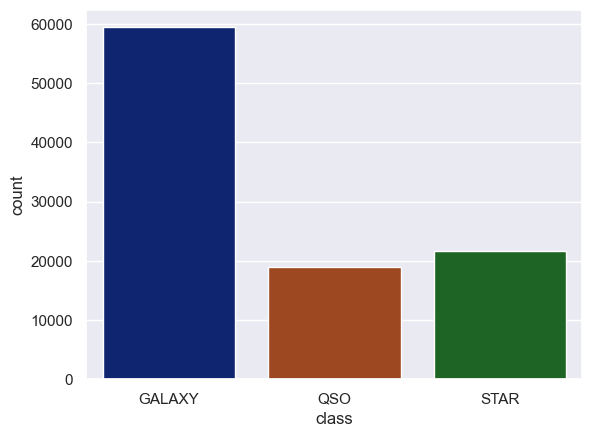

In [9]:
sns.countplot(x = df['class'])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])

In [11]:
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [12]:
X = df[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']]
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [13]:
y = df['class']
y


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [15]:
y.value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [16]:
y_res.value_counts()

0    59445
1    59445
2    59445
Name: class, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30)

In [18]:
score_df = pd.DataFrame(columns=['Algorithm', 'Recall score'])

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

from sklearn.metrics import recall_score
LR_score = recall_score(y_test, y_pred1, average='weighted')
print(LR_score)

0.9318365332854835


In [20]:
score_df = score_df.append({'Algorithm':'LogisticRegression', 'Recall score': LR_score}, ignore_index = True)
score_df 

,Algorithm,Recall score
0,LogisticRegression,0.931837


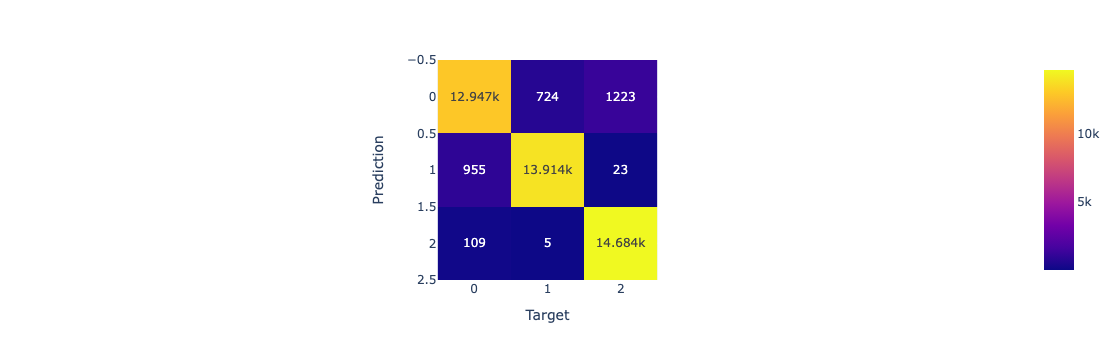

In [28]:
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_pred1), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     14894
           1       0.95      0.93      0.94     14892
           2       0.92      0.99      0.96     14798

    accuracy                           0.93     44584
   macro avg       0.93      0.93      0.93     44584
weighted avg       0.93      0.93      0.93     44584



In [21]:
knn_df = pd.DataFrame(columns=['Neighbors','Recall score'])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)    
    knn_df = knn_df.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
    
knn_df

,Neighbors,Recall score
0,1.0,0.931051
1,2.0,0.913579
2,3.0,0.914902
3,4.0,0.905616
4,5.0,0.903777
5,6.0,0.897160
6,7.0,0.894940
7,8.0,0.889198
8,9.0,0.887942
9,10.0,0.881998


In [23]:
knn_df = knn_df.sort_values(by='Recall score', ascending = False)
knn_df.head()

,Neighbors,Recall score
0,1.0,0.931051
2,3.0,0.914902
1,2.0,0.913579
3,4.0,0.905616
4,5.0,0.903777


In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import recall_score
knn_score = recall_score(y_test, y_pred2, average='weighted')
print(knn_score)

0.9310514982953526


In [25]:
score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,LogisticRegression,0.931837
1,KNN,0.931051


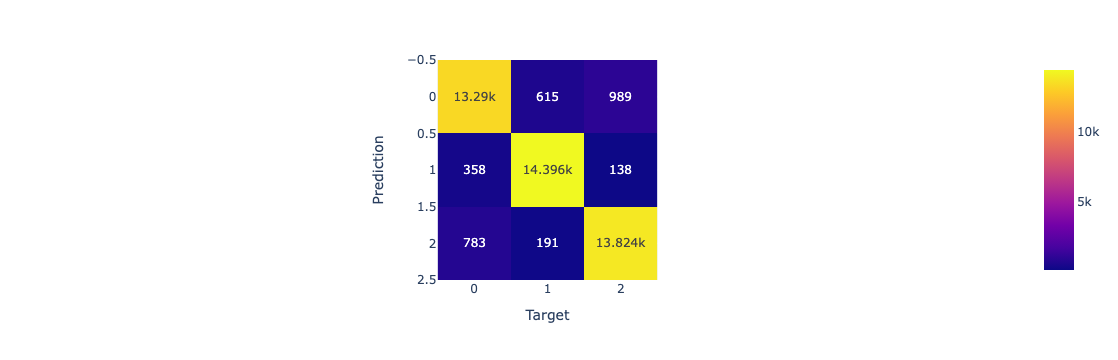

In [30]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_pred2), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     14894
           1       0.95      0.97      0.96     14892
           2       0.92      0.93      0.93     14798

    accuracy                           0.93     44584
   macro avg       0.93      0.93      0.93     44584
weighted avg       0.93      0.93      0.93     44584



In [27]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(X_train,y_train)
predicted = svm_clf.predict(X_test)
score = svm_clf.score(X_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.534


In [34]:
svm_score = recall_score(y_test, predicted, average='weighted')
print(svm_score)
score_df = score_df.append({'Algorithm':'SVM', 'Recall score': svm_score}, ignore_index = True)
score_df

0.5342275255697111


,Algorithm,Recall score
0,LogisticRegression,0.931837
1,KNN,0.931051
2,KNN,0.931051
3,SVM,0.534228


In [41]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.48      0.43      0.46     14894
           1       0.54      0.65      0.59     14892
           2       0.58      0.53      0.55     14798

    accuracy                           0.53     44584
   macro avg       0.53      0.53      0.53     44584
weighted avg       0.53      0.53      0.53     44584



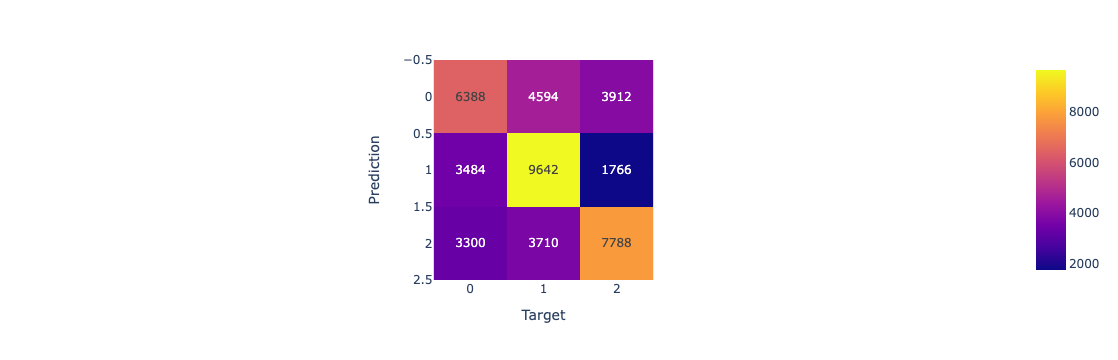

In [31]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, predicted), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')